In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
from matplotlib.backends.backend_pdf import PdfPages

# read in the excel file into pandas
## note that we can read separate sheets separately. Also, saying `index_col=0` uses the 0th column as the index (which is census tract)

In [18]:
df_pollution = pd.read_excel('social/ces3results.xlsx', sheet_name=('CES 3.0 (2018 Update)'), index_col=0)
df_demog = pd.read_excel('social/ces3results.xlsx', sheet_name=('Demographic profile'), index_col=0,
                        skiprows=1) # note skiprows=1 for deomgraphics -- see spreadsheet for reason why

In [19]:
df_demog.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%)
6019001100,94.090246,100.000000,95-100% (highest scores),3174,Fresno,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8
6071001600,90.677839,99.987388,95-100% (highest scores),6133,San Bernardino,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7
6019000200,85.970036,99.974776,95-100% (highest scores),3167,Fresno,21.5,72.5,6.0,63.6,5.3,18.9,0.6,9.8,1.8
6077000801,82.491521,99.962164,95-100% (highest scores),6692,San Joaquin,18.7,74.5,6.8,57.4,6.0,12.5,0.3,20.9,2.8
6019001500,82.030814,99.949552,95-100% (highest scores),2206,Fresno,14.8,72.1,13.1,71.8,21.4,1.2,0.5,4.5,0.6


# now read in spatial data with geopandas
## this also is read in as a dataframe but with some special geospatial metadata and a `geometry` that contains a `shapely` geometry object (Point, Polygon, etc.) for each row

In [20]:
gdf = gp.read_file('social/CESJune2018Update_SHP/CES3June2018Update.shp', index_col=0)

In [21]:
gdf.index = gdf.tract
gdf

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,...,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry
tract,,,,,,,,,,,,,,,,,,,,,
6.083002e+09,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,0.035,...,0.5,7.2,1.6,3507,6,12,6999.357622,2.847611e+06,55-60%,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
6.083002e+09,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,0.035,...,0.2,5.5,1.6,2733,7,14,19100.578003,1.635292e+07,65-70%,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
6.083002e+09,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,0.035,...,0.5,2.9,2.6,4689,5,9,4970.985933,1.352330e+06,40-45%,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
6.083002e+09,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,0.035,...,0.6,4.0,2.6,7864,1,1,6558.956142,2.417717e+06,1-5% (lowest scores),"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
6.083002e+09,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,0.035,...,0.8,3.5,3.2,7863,1,1,6570.368642,2.608422e+06,1-5% (lowest scores),"POLYGON ((-39465.107 -348499.262, -38244.305 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.037430e+09,6.037430e+09,5837,Los Angeles,91016,Monrovia,-118.003801,34.153182,18.15,34,0.053,...,0.2,7.6,3.1,5252,4,7,7166.130480,1.938016e+06,30-35%,"POLYGON ((185152.883 -426843.064, 185240.372 -..."
6.037431e+09,6.037431e+09,4118,Los Angeles,91007,Arcadia,-118.058617,34.130036,15.61,27,0.051,...,0.2,56.7,2.1,5656,3,6,3941.781794,4.855630e+05,25-30%,"POLYGON ((179874.001 -429709.190, 179885.911 -..."
6.037431e+09,6.037431e+09,6629,Los Angeles,91016,Monrovia,-117.997192,34.136075,40.08,76,0.053,...,0.2,9.0,2.2,1743,8,16,8020.091306,3.015661e+06,75-80%,"POLYGON ((184530.476 -428031.241, 184535.255 -..."


<AxesSubplot:>

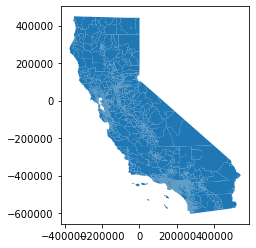

In [22]:
gdf.plot()

In [23]:
gdf.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:ylabel='Frequency'>

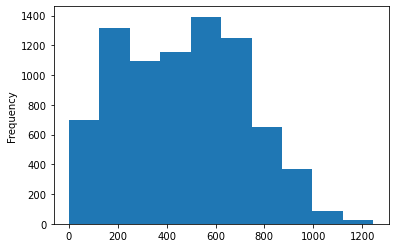

In [24]:
gdf['drink'].plot( kind='hist')

<AxesSubplot:>

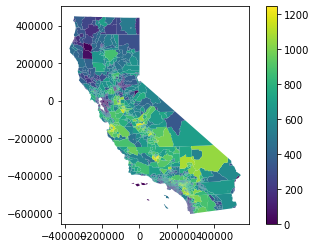

In [25]:
gdf.plot(column='drink', legend=True, rasterized=True)

# make sure they have the same index entries, based on census districts

In [26]:
assert sorted(gdf.index) == sorted(df_demog.index)

In [27]:
assert sorted(gdf.index) == sorted(df_pollution.index)

# now some data munging

In [28]:
gdf.columns.values

array(['tract', 'pop2010', 'California', 'ZIP', 'City', 'Longitude',
       'Latitude', 'CIscore', 'CIscoreP', 'ozone', 'ozoneP', 'pm', 'pmP',
       'diesel', 'dieselP', 'drink', 'drinkP', 'pest', 'pestP', 'RSEIhaz',
       'RSEIhazP', 'traffic', 'trafficP', 'cleanups', 'cleanupsP',
       'gwthreats', 'gwthreatsP', 'haz', 'hazP', 'iwb', 'iwbP', 'swis',
       'swisP', 'Pollution', 'PollutionS', 'PollutionP', 'asthma',
       'asthmaP', 'lbw', 'lbwP', 'cvd', 'cvdP', 'edu', 'eduP', 'ling',
       'lingP', 'pov', 'povP', 'unemp', 'unempP', 'housingB', 'housingBP',
       'PopChar', 'PopCharSco', 'PopCharP', 'Children_u', 'Pop_11_64_',
       'Elderly_ov', 'Hispanic_p', 'White_pct', 'African_Am',
       'Native_Ame', 'Asian_Amer', 'Other_pct', 'OBJECTID_1', 'CIdecile',
       'CIvigintil', 'Shape_Leng', 'Shape_Area', 'CES2018_Rn', 'geometry'],
      dtype=object)

In [29]:
df_demog.columns

Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Children < 10 (%)', 'Pop 11-64 years (%)', 'Elderly > 65 (%)',
       'Hispanic (%)', 'White (%)', 'African American (%)',
       'Native American (%)', 'Asian American (%)', 'Other (%)'],
      dtype='object')

In [30]:
df_pollution.columns

Index(['Total Population', 'California County', 'ZIP',
       'Nearby City \n(to help approximate location only)', 'Longitude',
       'Latitude', 'CES 3.0 Score', ' CES 3.0 Percentile',
       'CES 3.0 \nPercentile Range', 'SB 535 Disadvantaged Community', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isol

### assemble a list of predictors

In [31]:
preds = []
for c in df_demog.columns:
    if '%' in c and 'Other' not in c:
        preds.append(c)
preds

['Children < 10 (%)',
 'Pop 11-64 years (%)',
 'Elderly > 65 (%)',
 'Hispanic (%)',
 'White (%)',
 'African American (%)',
 'Native American (%)',
 'Asian American (%)']

In [32]:
preds_ext = []
preds_ext.extend(['Education',
       'Linguistic Isolation',
       'Poverty', 'Unemployment'])
preds_ext

['Education', 'Linguistic Isolation', 'Poverty', 'Unemployment']

### subset a few columns 

In [33]:
pollution = ['Ozone',
       'PM2.5','Diesel PM', 
       'Drinking Water', 'Pesticides',
       'Tox. Release',  'Traffic',
        'Cleanup Sites',
       'Groundwater Threats', 'Haz. Waste',
        'Imp. Water Bodies',
       'Solid Waste',  'Pollution Burden',
       'Pollution Burden Score']
illness = ['Asthma', 'Low Birth Weight', 'Cardiovascular Disease']

## now some merging to pull data together with the shapefile geometry

In [34]:
gdf  =gdf.join(df_demog[preds])[preds + ['geometry']]

In [35]:
gdf

,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),geometry
tract,,,,,,,,,
6.083002e+09,16.4,70.5,13.1,57.5,31.3,1.9,0.5,7.2,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
6.083002e+09,20.6,73.2,6.2,74.0,17.4,1.4,0.2,5.5,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
6.083002e+09,14.3,72.5,13.2,52.2,40.9,0.8,0.5,2.9,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
6.083002e+09,10.9,74.7,14.4,20.0,71.9,1.0,0.6,4.0,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
6.083002e+09,10.5,73.6,15.9,25.7,65.4,1.5,0.8,3.5,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."
...,...,...,...,...,...,...,...,...,...
6.037430e+09,11.4,75.5,13.1,22.0,63.9,3.2,0.2,7.6,"POLYGON ((185152.883 -426843.064, 185240.372 -..."
6.037431e+09,11.4,76.1,12.5,16.3,22.7,2.0,0.2,56.7,"POLYGON ((179874.001 -429709.190, 179885.911 -..."
6.037431e+09,14.2,76.9,8.9,61.2,14.2,13.2,0.2,9.0,"POLYGON ((184530.476 -428031.241, 184535.255 -..."


In [36]:
gdf = gdf.join(df_pollution[preds_ext])

In [37]:
gdf.columns

Index(['Children < 10 (%)', 'Pop 11-64 years (%)', 'Elderly > 65 (%)',
       'Hispanic (%)', 'White (%)', 'African American (%)',
       'Native American (%)', 'Asian American (%)', 'geometry', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment'],
      dtype='object')

In [38]:
gdf = gdf.join(df_pollution[pollution])

In [39]:
gdf.columns.values

array(['Children < 10 (%)', 'Pop 11-64 years (%)', 'Elderly > 65 (%)',
       'Hispanic (%)', 'White (%)', 'African American (%)',
       'Native American (%)', 'Asian American (%)', 'geometry',
       'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment',
       'Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides',
       'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste',
       'Pollution Burden', 'Pollution Burden Score'], dtype=object)

In [40]:
gdf = gdf.join(df_pollution[illness])

In [41]:
from EJ_helpers import find_correlations

IndentationError: unindent does not match any outer indentation level (EJ_helpers.py, line 14)

In [ ]:
pollutioncorrs = pd.DataFrame(index=pollution)
for pred in preds:
    pollutioncorrs[pred] = find_correlations(pred,pollution, gdf)
    
illnesscorrs = pd.DataFrame(index=illness)
for pred in preds:
    illnesscorrs[pred] = find_correlations(pred,illness, gdf)
    
    

In [ ]:
pollutioncorrs.plot.bar(figsize=(10,10), subplots=True, legend=False, grid=True)
plt.tight_layout()

In [ ]:
illnesscorrs.plot.bar(figsize=(10,10), subplots=True, legend=False, grid=True)
plt.tight_layout()

In [ ]:
from EJ_helpers import plot_relation

In [ ]:
plot_relation(gdf, 'African American (%)', 'Asthma')

In [ ]:
plot_relation(gdf,'Hispanic (%)','PM2.5')

In [111]:
with PdfPages('all_plots.pdf') as outpdf:
    for cpred in preds:
        for cresp in pollution:
            print (f'plotting {cpred} with {cresp}')
            plot_relation(gdf, cpred, cresp, outpdf)
        for cresp in illness:
            print (f'plotting {cpred} with {cresp}')
            plot_relation(gdf, cpred, cresp, outpdf)
            

plotting Children < 10 (%) with Ozone
plotting Children < 10 (%) with PM2.5
plotting Children < 10 (%) with Diesel PM
plotting Children < 10 (%) with Drinking Water
plotting Children < 10 (%) with Pesticides
plotting Children < 10 (%) with Tox. Release
plotting Children < 10 (%) with Traffic
plotting Children < 10 (%) with Cleanup Sites
plotting Children < 10 (%) with Groundwater Threats
plotting Children < 10 (%) with Haz. Waste
plotting Children < 10 (%) with Imp. Water Bodies
plotting Children < 10 (%) with Solid Waste
plotting Children < 10 (%) with Pollution Burden
plotting Children < 10 (%) with Pollution Burden Score
plotting Children < 10 (%) with Asthma
plotting Children < 10 (%) with Low Birth Weight
plotting Children < 10 (%) with Cardiovascular Disease
plotting Pop 11-64 years (%) with Ozone
plotting Pop 11-64 years (%) with PM2.5
plotting Pop 11-64 years (%) with Diesel PM
plotting Pop 11-64 years (%) with Drinking Water
plotting Pop 11-64 years (%) with Pesticides
plottin